In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from scipy.spatial.distance import cdist

## import the library below:

In [9]:
from PyEyeSim import EyeData

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Step 1. 

#### read .csv file containing fixations for all stimuli and participants in a single file with pandas

In [11]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'FixDatUrban.csv'
FixData=pd.read_csv(FilePath)
print(np.shape(FixData))


(29324, 17)


In [12]:
FixData=FixData[FixData.age>0]

In [13]:
FixData

,Unnamed: 0,SUBJECTINDEX,age,answer,catch,category,dataset_nr,end,filenumber,fix,on_image,patchpos,start,trial,valid,mean_x,mean_y
0,105,1.0,2.0,1.0,0.0,8.0,0.0,656.0,38.0,1.0,1.0,633.0,490.0,7.0,1.0,397.92910,666.52770
1,106,1.0,2.0,1.0,0.0,8.0,0.0,908.0,38.0,2.0,1.0,1008.0,722.0,7.0,1.0,887.92660,652.97120
2,107,1.0,2.0,1.0,0.0,8.0,0.0,1166.0,38.0,3.0,1.0,633.0,946.0,7.0,1.0,1028.11320,561.21210
3,108,1.0,2.0,1.0,0.0,8.0,0.0,1436.0,38.0,4.0,1.0,1008.0,1224.0,7.0,1.0,733.53345,746.76150
4,109,1.0,2.0,1.0,0.0,8.0,0.0,1722.0,38.0,5.0,1.0,633.0,1492.0,7.0,1.0,371.01990,589.24677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29319,105725,58.0,1.0,0.0,0.0,8.0,0.0,4283.0,63.0,19.0,1.0,256.0,4065.0,124.0,1.0,690.36060,784.64430
29320,105726,58.0,1.0,0.0,0.0,8.0,0.0,4465.0,63.0,20.0,1.0,558.0,4313.0,124.0,1.0,800.40640,734.00770
29321,105727,58.0,1.0,0.0,0.0,8.0,0.0,4691.0,63.0,21.0,1.0,256.0,4513.0,124.0,1.0,1101.67090,493.60037
29322,105728,58.0,1.0,0.0,0.0,8.0,0.0,4881.0,63.0,22.0,1.0,558.0,4717.0,124.0,1.0,1153.76810,456.48746


## Step 2

#### pass pandas dataframe, to pyeyesim, providing information on screen size in pixels

(we run the pipeline here because this nb is to demonstrate the inference pipeline not the descriptives)


dataset size:  (21165, 17)
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
column found:  mean_x  default:  mean_x
column found:  mean_y  default:  mean_y
info found for 40 subjects, and 64 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
1.0
stimulus size in y is full screen
stimulus size in x full screen
 
2.0
stimulus size in y is full screen
stimulus size in x full screen
 
3.0
stimulus size in y is full screen
stimulus size in x full screen
 
4.0
stimulus size in y is full screen
stimulus size in x full screen
 
5.0
stimulus size in y is full screen
stimulus size in x full screen
 
6.0
stimulus size in y is full screen
stimulus size in x full screen
 
7.0
stimulus size in y is full screen
stimulus size in x f

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
        53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 36., 37., 38., 39., 40., 41., 42., 43., 44.,
        45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57.,
        58.]))

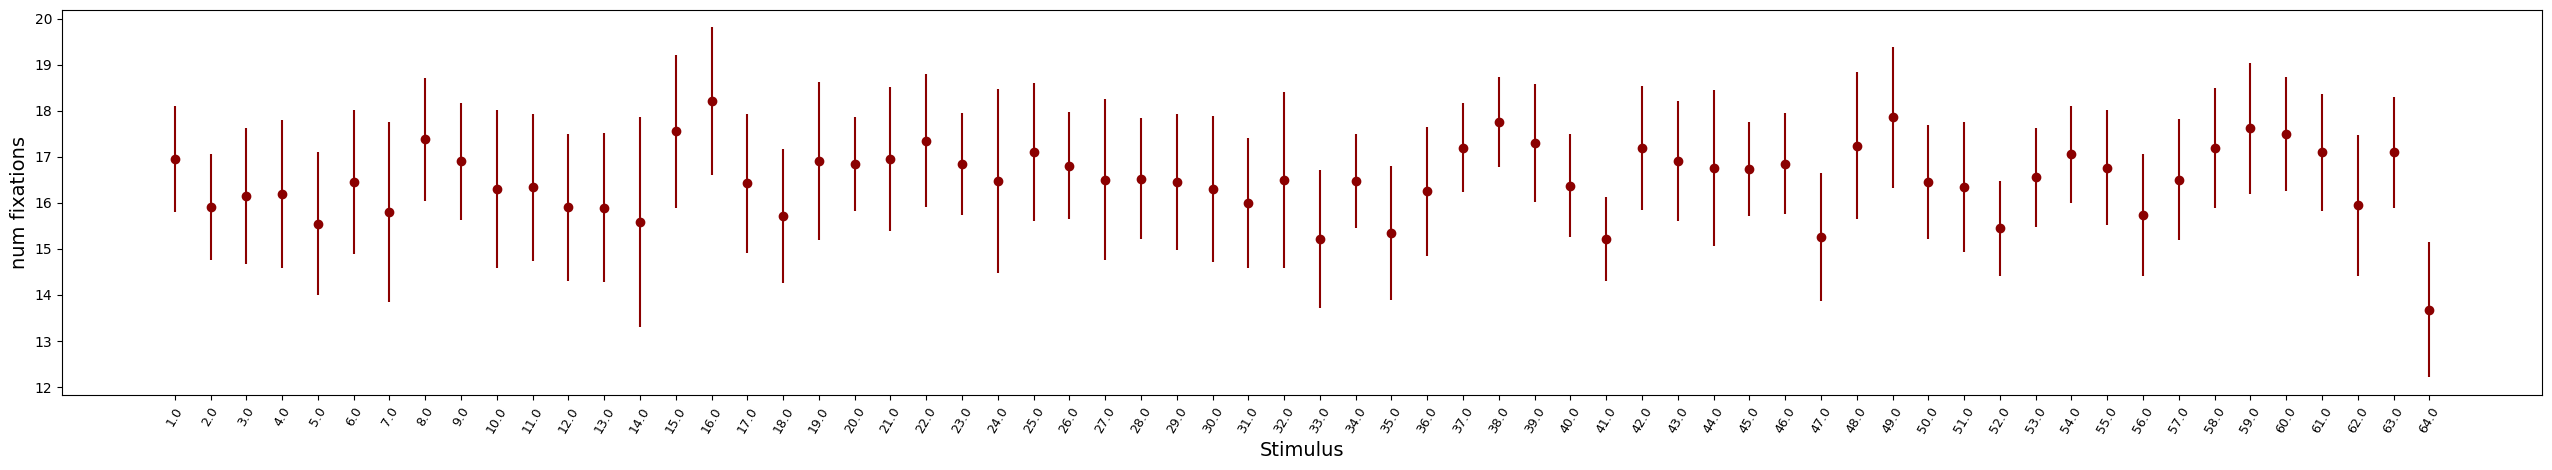

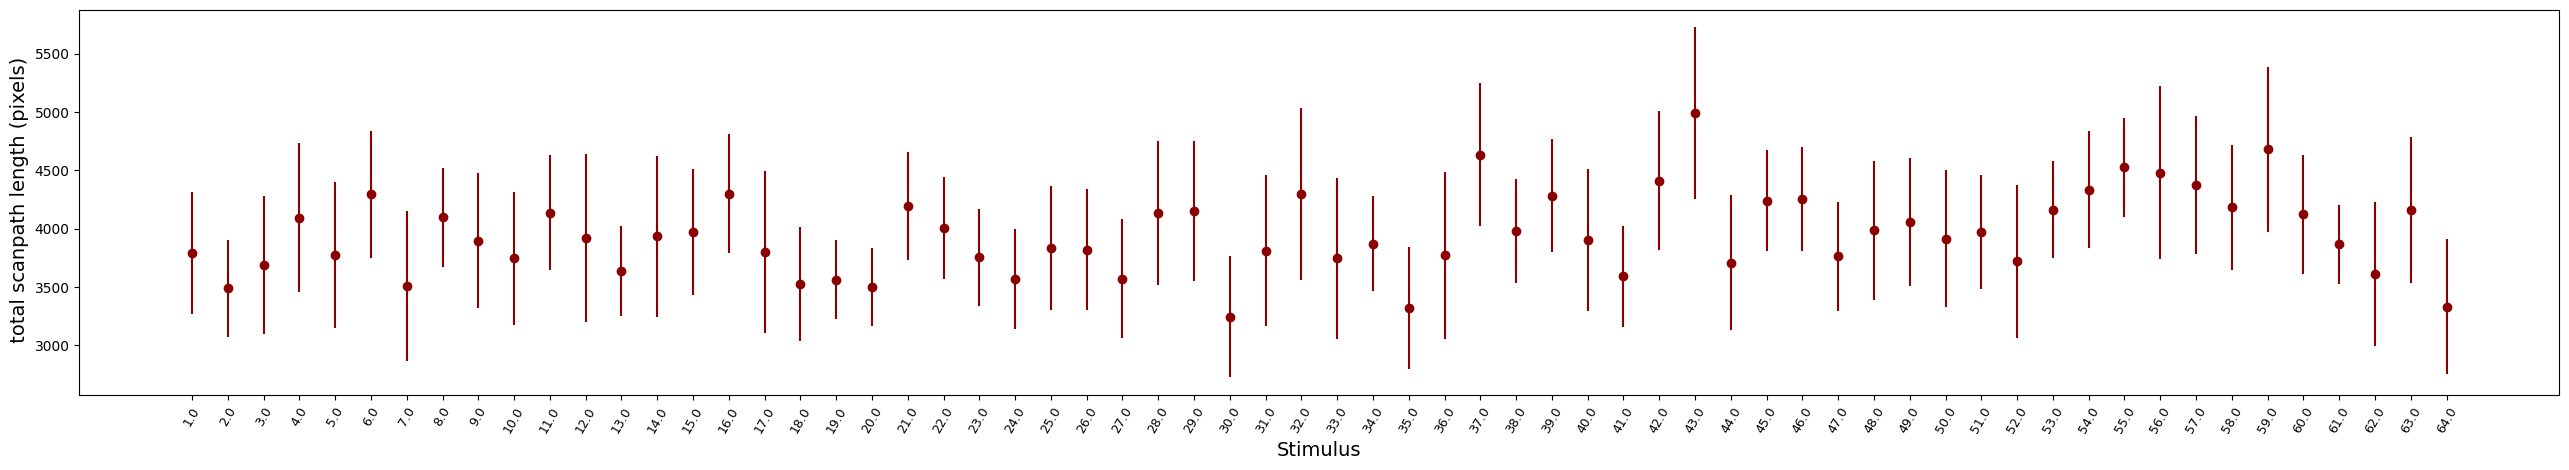

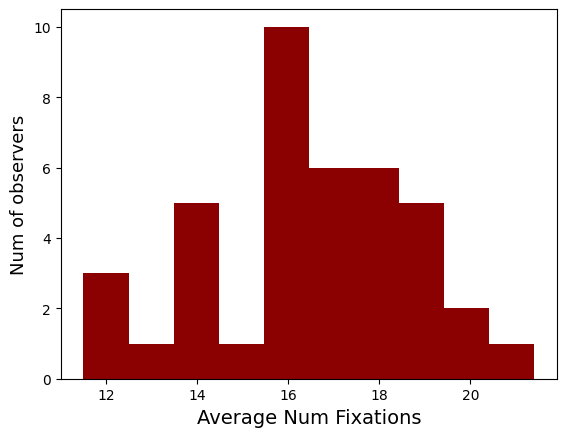

In [14]:

sizeX,sizeY=1280,960


UrbanDat=EyeData(FixData,sizeX,sizeY)
UrbanDat.DataInfo(FixDuration='length',Stimulus='filenumber',subjectID='SUBJECTINDEX',StimPath=Path+'8/',StimExt='.png')
UrbanDat.RunDescriptiveFix(Visual=1)


We test the the Hidden Markov Model (HMM) compering the pairwaize likelihood of the model with all the stimuli, in order to validate the algorithm.

We create a two matrix of size (n_stimuli, n_stimuli) where each element is the likelihood of the model. We fit the model using train data and then we compute the likelihood of the model for each stimuli in the train and test data.

We put a red dot in corrispondence of the value with the highest likelihood for each stimuli in the test data.

We expect that the red dot is in the diagonal of the matrix, this means that the model is able to predict better the stimuli that it has seen during the training, and in the test data the model is able to predict better data that are similar to the train data.

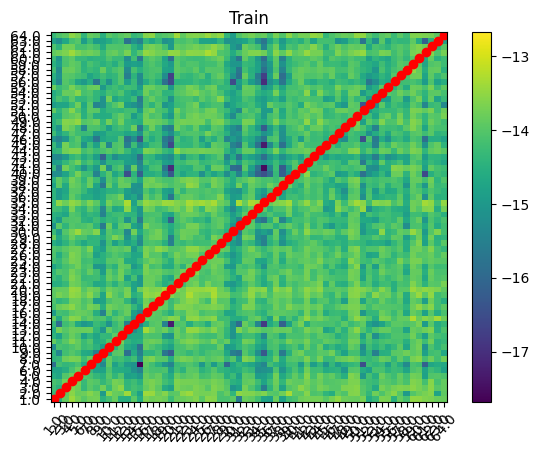

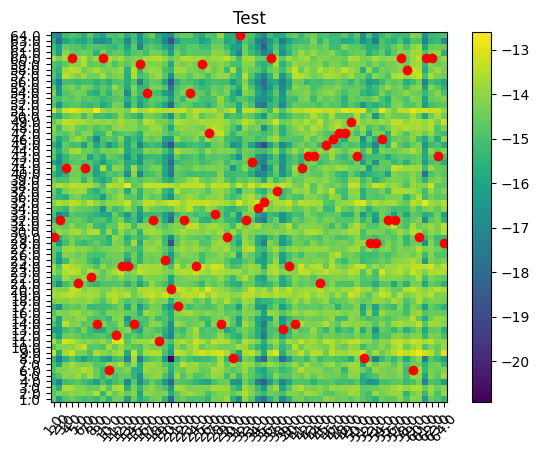

In [169]:
S0, S1 = UrbanDat.HMMSimPipelineAll2All(ncomp=7, ntest=3)

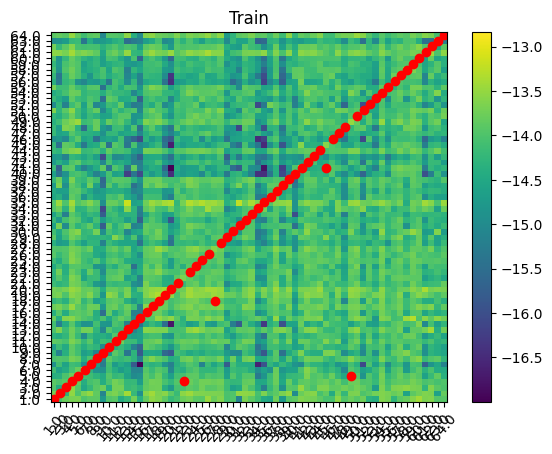

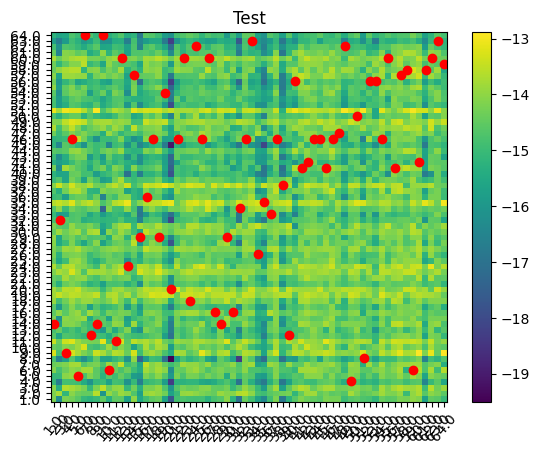

In [170]:
S0, S1 = UrbanDat.HMMSimPipelineAll2All(ncomp=4, ntest=3)

In the beginning we can see that the model works good with the training data, but is not able to predict correctly the stimuli in the test data, this could be mainly for the amount of data that we train the model.

As seen in previous analysis, we can increase the performance of the result by increasing the number of iteration (repetition of fitting process on the same data) and giving more possilbe number of components, taking in the end only the best model resulting from the fitting process.

Model is not converging.  Current: -4241.830216615299 is not greater than -4231.966548187555. Delta is -9.863668427743505
Model is not converging.  Current: -3978.3496280692875 is not greater than -3975.848814781325. Delta is -2.500813287962501


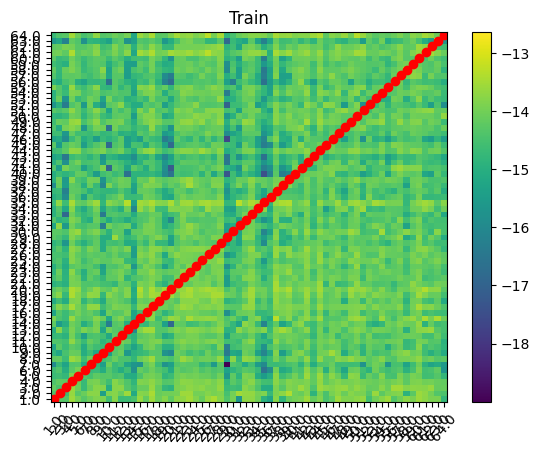

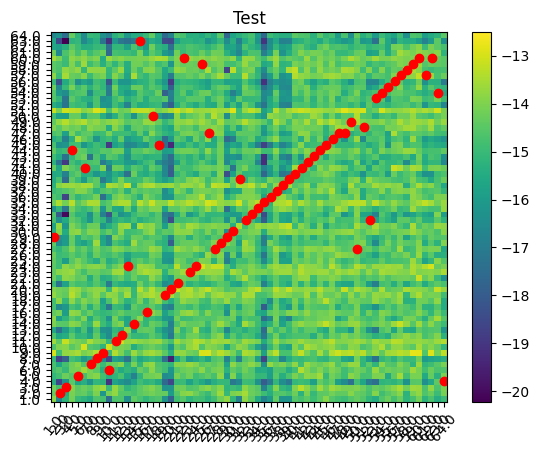

In [243]:
# Computation time is too long for this one 77 minutes with i7-10870H 16GB RAM
#S0, S1 = UrbanDat.HMMSimPipelineAll2All(ncomp=[3,4,5,6,7], ntest=3, iter=10)

# Uncomment this one to try with less stimuli
#S0, S1 = UrbanDat.HMMSimPipelineAll2All(ncomp=[3,4,5,6,7], ntest=3, iter=10, stimuli=[1,2,3,4,5,6,7,8,9,10])

Model is not converging.  Current: -4234.5790769749165 is not greater than -4231.104119904493. Delta is -3.474957070423443
Model is not converging.  Current: -3760.0921723881397 is not greater than -3756.452458042627. Delta is -3.639714345512857
Model is not converging.  Current: -3846.6836310342733 is not greater than -3835.9478261339923. Delta is -10.735804900280982


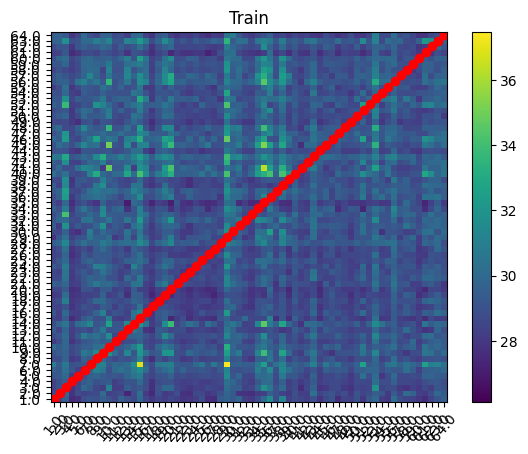

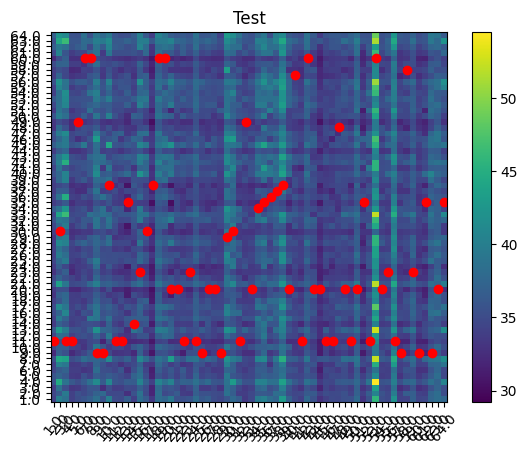

In [ ]:
# Computation time is too long for this one 77 minutes with i7-10870H 16GB RAM
#S0, S1 = UrbanDat.HMMSimPipelineAll2All(ncomp=[3,4,5,6,7], ntest=3, iter=10, bic=True)

The final result fits better with the expectation, the red dot in the training and test data are mostly in the diagonal of the matrix.

The model after fit 10 times with 5 different number of components is able to predict better stimuli in the same distribution of the train data.

As previously studied, increasing the number of iteration will lead to a better result, but this is computationally expensive.

Now we will try a similar approach to test and evaluate the matricies dissimilarity measure proposed in the PyEyeSimInferenceDemo2.ipynb

In this case we consider two models, every iteration we fit the first model with the train data of one stimulus and the second model with the train data of another stimulus, then we compute the dissimilarity measure between the two models.

We expect that the dissimilarity measure il the lowest when the two stimuli are identical, ie the diagonal of the matrix.

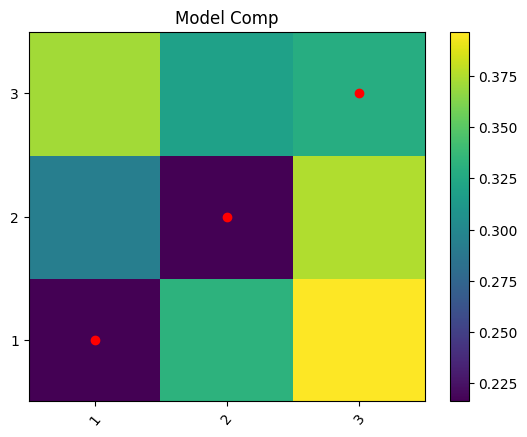

In [19]:
S = UrbanDat.HMMSimPiepelineModel2Model(ncomp=[3,4,5], iter=20, stimuli=[1,2,3])

In [27]:
# Select 10 random stimuli
stim = np.random.choice(UrbanDat.stimuli, 10, replace=False)
stim = [int(s) for s in stim]

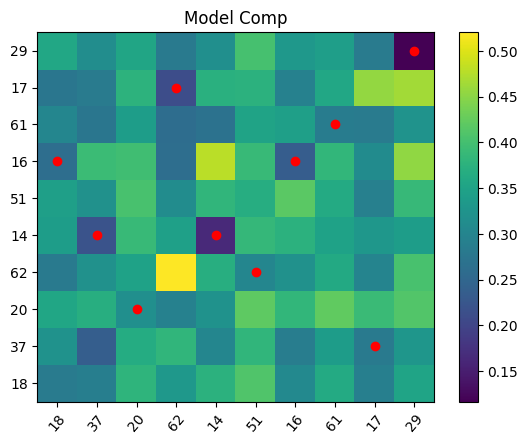

In [18]:
S = UrbanDat.HMMSimPiepelineModel2Model(ncomp=[3,4,5], iter=20, stimuli=stim)

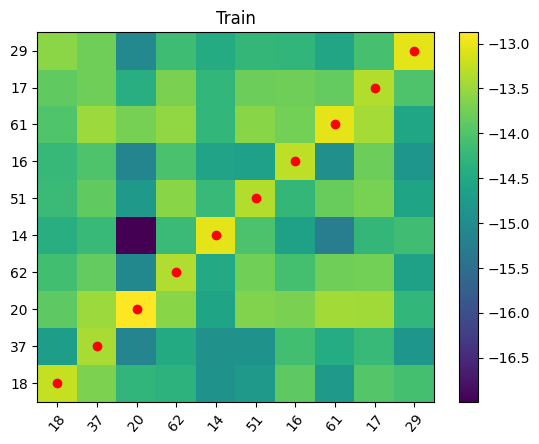

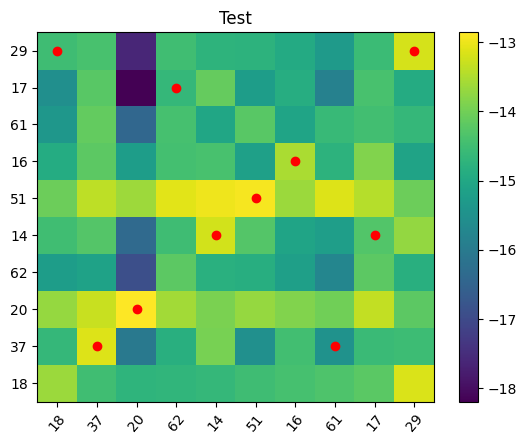

In [8]:
S0, S1 = UrbanDat.HMMSimPipelineAll2All(ncomp=[3,4,5], iter=10, stimuli=stim)

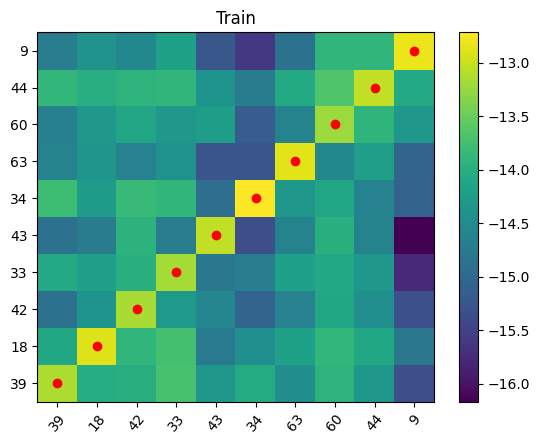

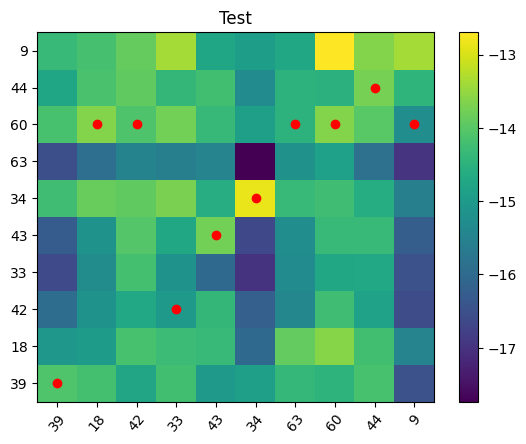

In [29]:
S0, S1 = UrbanDat.HMMSimPipelineAll2All(ncomp=[2,3,4,5,6,7], iter=1, stimuli=stim)

Model is not converging.  Current: -4168.231012918618 is not greater than -4168.095731368882. Delta is -0.13528154973573692
Model is not converging.  Current: -4036.68964601756 is not greater than -4031.9209758800616. Delta is -4.768670137498248


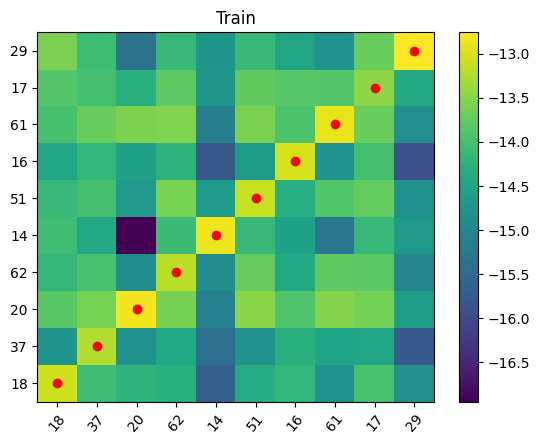

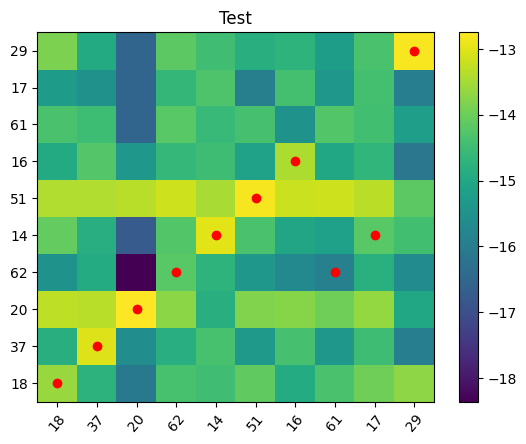

In [14]:
S0, S1 = UrbanDat.HMMSimPipelineAll2All(ncomp=[2,3,4,5,6,7], iter=20, stimuli=stim)

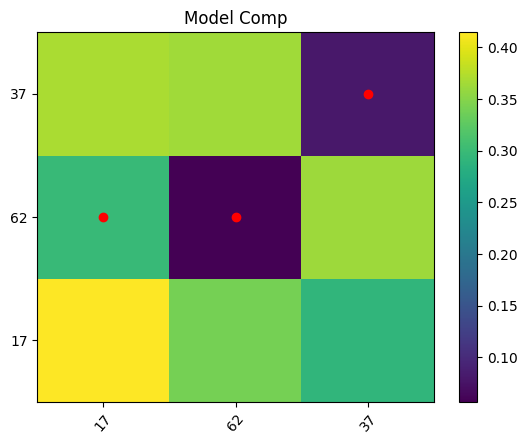

In [20]:
S = UrbanDat.HMMSimPiepelineModel2Model(ncomp=[3,4,5], iter=20, stimuli=[17,62,37])

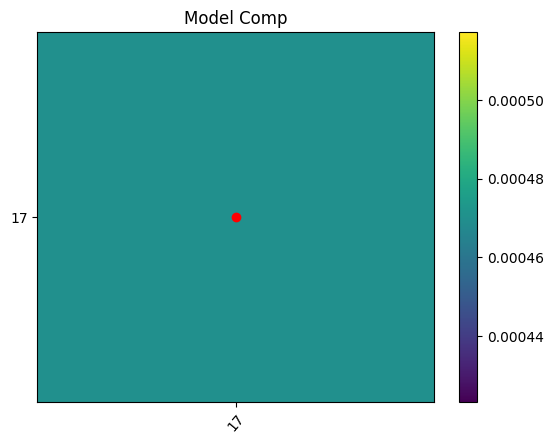

In [26]:
S = UrbanDat.HMMSimPiepelineModel2Model(ncomp=[2,3,4,5,6,7], iter=100, stimuli=[17])

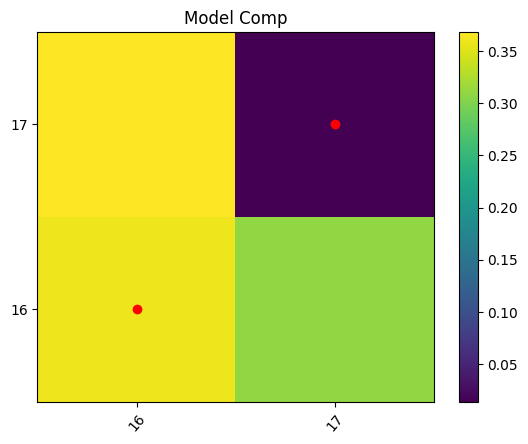

In [28]:
S = UrbanDat.HMMSimPiepelineModel2Model(ncomp=[2,3,4,5,6,7], iter=100, stimuli=[16,17])

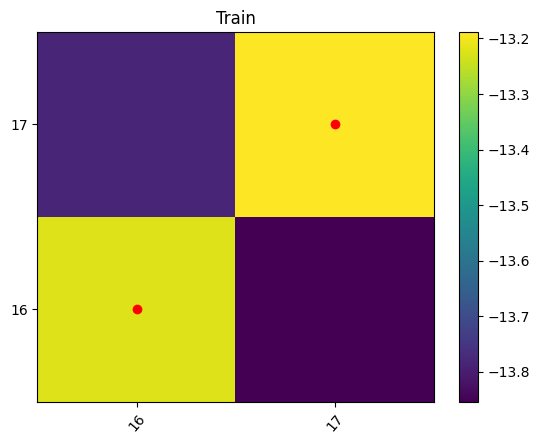

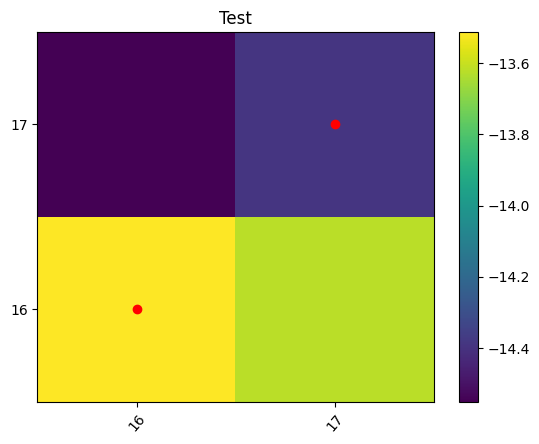

In [9]:
S0, S1 = UrbanDat.HMMSimPipelineAll2All(ncomp=[2,3,4,5,6,7], iter=10, stimuli=[16,17])

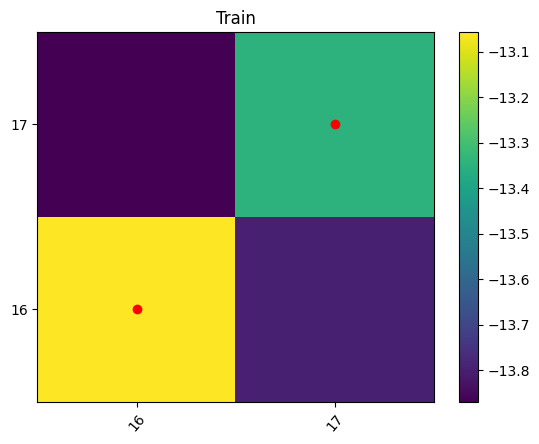

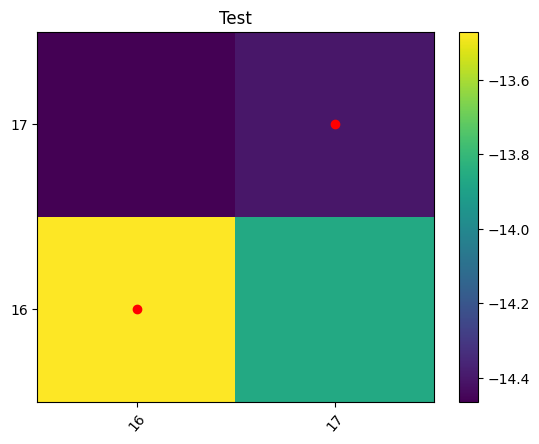

In [10]:
S0, S1 = UrbanDat.HMMSimPipelineAll2All(ncomp=[2,3,4,5,6,7], iter=10, stimuli=[16,17])

These results are consistent with the expectation, even if it seems more important to increase the number of iteration compared to the likelihood measure.

Comparing the two method is possible to notice that the performance of the likelihood method is favourite compared to matricies dissimilarity measure, since with the traing data we obtain a more stable and computatiloannly efficent result.

We can take in consideration just the result with the training data, since also in the model2model method are used the same dataset to fit the two models.

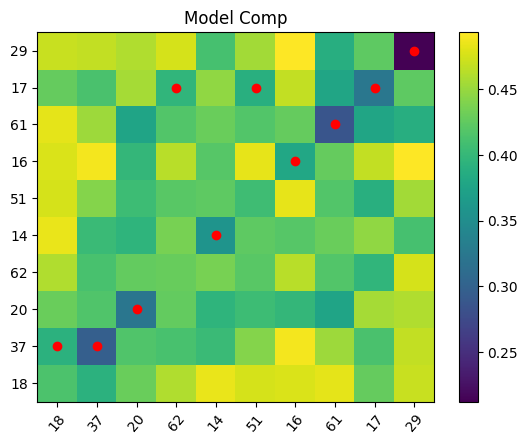

In [ ]:
S = UrbanDat.HMMSimPiepelineModel2ModelOpt(ncomp=[2,3,4,5,6,7], iter=20, stimuli=stim)

## Subject with Subject

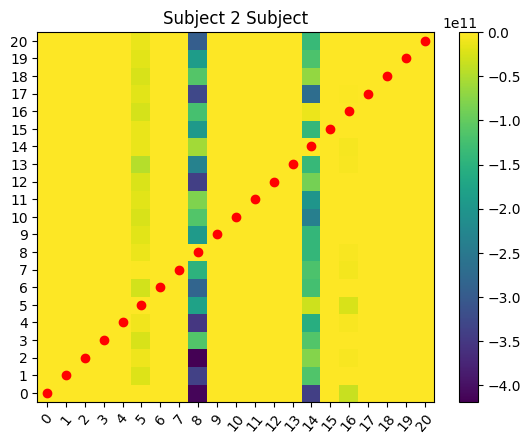

In [78]:
S = UrbanDat.HMMSimPipelineSubject2Subject(ncomp=[2,3,4,5,6,7,8,9,10], iter=1, stim=1)

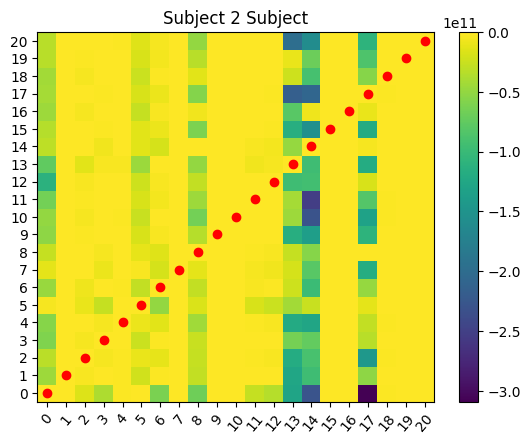

In [79]:
S = UrbanDat.HMMSimPipelineSubject2Subject(ncomp=[2,3,4,5,6,7,8,9,10], iter=10, stim=1)

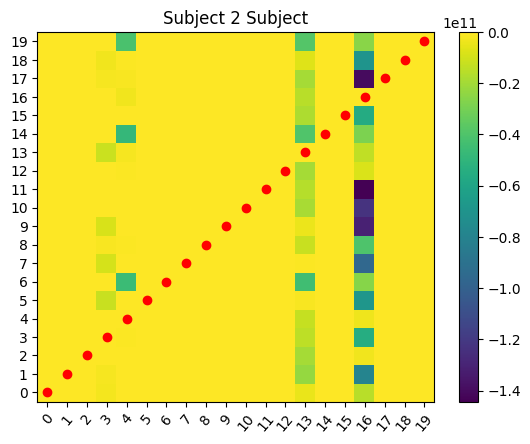

In [80]:
S = UrbanDat.HMMSimPipelineSubject2Subject(ncomp=[2,3,4,5,6,7,8,9,10], stim=2)

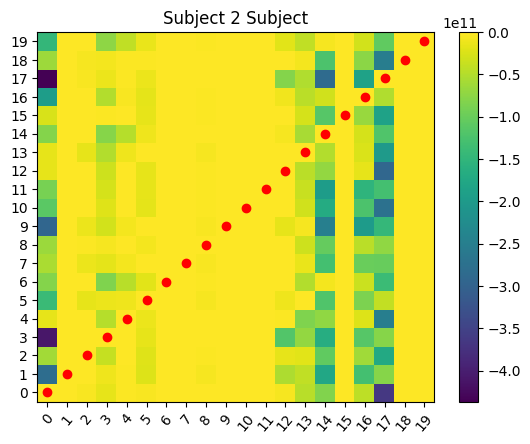

In [81]:
S = UrbanDat.HMMSimPipelineSubject2Subject(ncomp=[2,3,4,5,6,7,8,9,10], iter=10, stim=2)

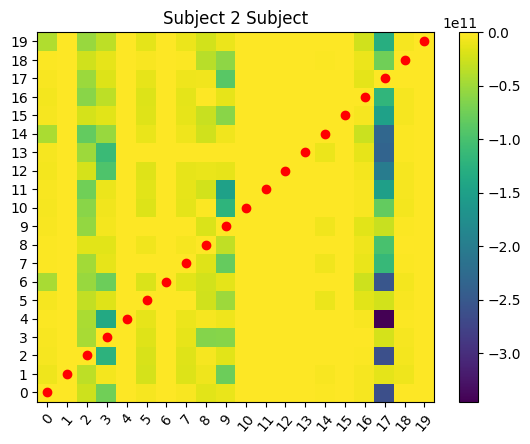

In [82]:
S = UrbanDat.HMMSimPipelineSubject2Subject(ncomp=[2,3,4,5,6,7,8,9,10], iter=20, stim=2)

## Angle Method

In [ ]:
def correctSub2Sub(Matrix):
    """
    Remove all the value equal to -np.inf and retrun the corrected matrix and a list of value that are not removed (position)
    """
    position = set()
    for i in range(Matrix.shape[0]):
        for j in range(Matrix.shape[1]):
            if Matrix[i,j] != -np.inf:
                position.add(i)

    CorrectMatrix = np.zeros((len(position),len(position)))
    position = list(position)
    for i in range(len(position)):
        for j in range(len(position)):
            CorrectMatrix[i,j] = Matrix[position[i],position[j]]

    return CorrectMatrix, position

In [50]:
SimSacP,SimVals,SimValsSD = UrbanDat.ScanpathSimSubject2Subject(stim=1, nHor=5, Thr=10, inferS=False,normalize='add')

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


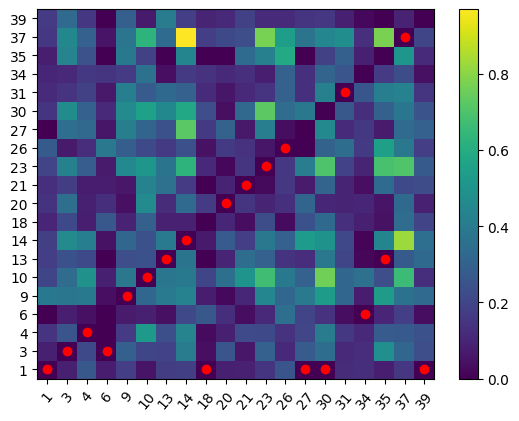

In [ ]:
S, ns = correctSub2Sub(SimVals)
UrbanDat.VisSimmat(S, stimuli=list(ns), negative=True)

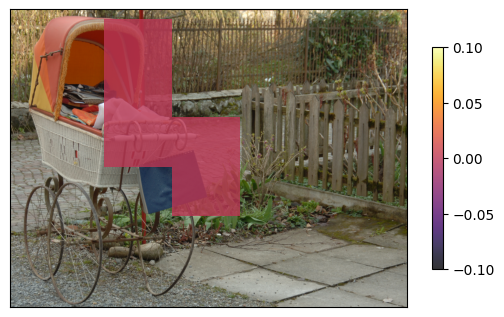

In [68]:
UrbanDat.VisGrid(SimSacP[3,6],1,cbar=True,inferS=True,alpha=.8)

The mean of the SimSacP[3,6] is also 0 so it result as good as SimSacP[6,6]

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


Best configuration: nHor=5, Thr=50 with score=486.11297934756305


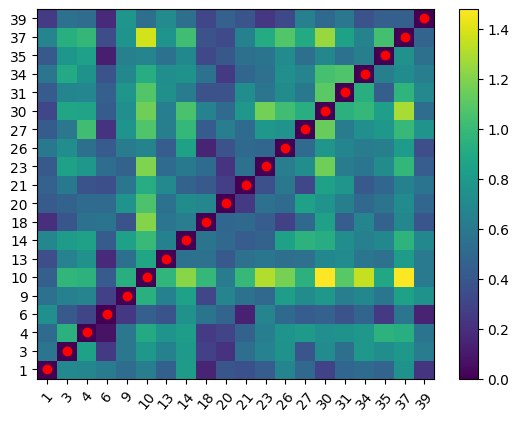

In [130]:

# Example lists of parameters
h = [5, 7, 9]
th = [10, 20, 30, 40, 50]

# Placeholder for best result
best_params = None
best_score = -np.inf
best_S = None
best_ns = None

# Loop through different values of nHor and Thr to find the optimal configuration
for i in range(len(h)):
    for j in range(len(th)):
        # Perform the scanpath similarity computation
        SimSacP, SimVals, SimValsSD = UrbanDat.ScanpathSimSubject2Subject(stim=1, nHor=h[i], Thr=th[j], inferS=True, normalize='add')
        
        # Calculate S and ns for the current configuration
        S, ns = correctSub2Sub(SimVals)
        
        # Calculate a score based on diagonal values relative to row and column
        diagonal_score = np.mean([S[k, k] for k in range(S.shape[0])])
        #to every diagonal score we add the sum of the row and column of the diagonal
        diagonal_score += np.sum([np.sum(S[k, :]) + np.sum(S[:, k]) for k in range(S.shape[0])])
        
        # Check if this configuration yields a better score
        if diagonal_score > best_score:
            best_score = diagonal_score
            best_params = (h[i], th[j])
            best_S = S
            best_ns = ns

# Display the best configuration and its similarity matrix
print(f"Best configuration: nHor={best_params[0]}, Thr={best_params[1]} with score={best_score}")
UrbanDat.VisSimmat(best_S, stimuli=list(best_ns), bic=True)


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


Best configuration: nHor=5, Thr=50 with score=495.94538037339436


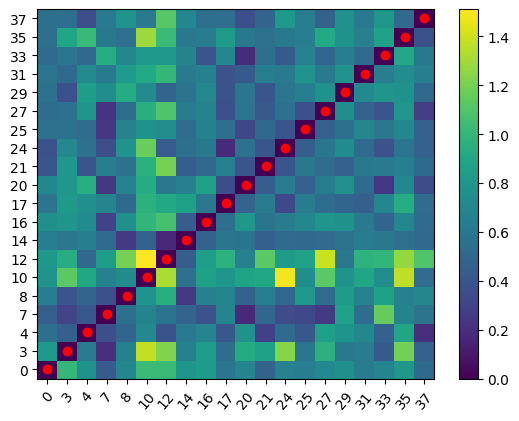

In [ ]:

# Example lists of parameters
h = [5, 7, 9]
th = [10, 20, 30, 40, 50]

# Placeholder for best result
best_params = None
best_score = -np.inf
best_S = None
best_ns = None

# Loop through different values of nHor and Thr to find the optimal configuration
for i in range(len(h)):
    for j in range(len(th)):
        # Perform the scanpath similarity computation
        SimSacP, SimVals, SimValsSD = UrbanDat.ScanpathSimSubject2Subject(stim=18, nHor=h[i], Thr=th[j], inferS=True, normalize='add')
        
        # Calculate S and ns for the current configuration
        S, ns = correctSub2Sub(SimVals)
        
        # Calculate a score based on diagonal values relative to row and column
        diagonal_score = np.mean([S[k, k] for k in range(S.shape[0])])
        #to every diagonal score we add the sum of the row and column of the diagonal
        diagonal_score += np.sum([np.sum(S[k, :]) + np.sum(S[:, k]) for k in range(S.shape[0])])
        
        # Check if this configuration yields a better score
        if diagonal_score > best_score:
            best_score = diagonal_score
            best_params = (h[i], th[j])
            best_S = S
            best_ns = ns

# Display the best configuration and its similarity matrix
print(f"Best configuration: nHor={best_params[0]}, Thr={best_params[1]} with score={best_score}")
UrbanDat.VisSimmat(best_S, stimuli=list(best_ns), negative=True)


Best configuration: nHor=5, Thr=50 with score=376.55442910840844


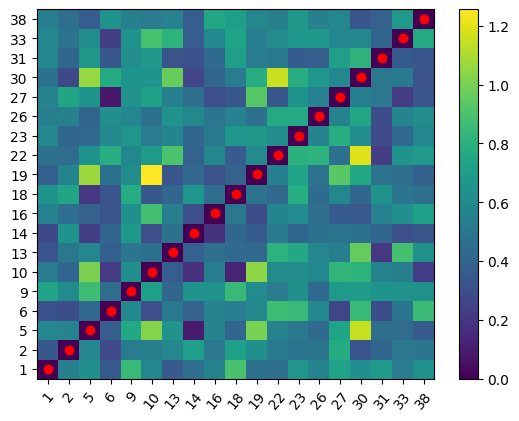

In [ ]:

# Example lists of parameters
h = [5, 7, 9]
th = [10, 20, 30, 40, 50]

# Placeholder for best result
best_params = None
best_score = -np.inf
best_S = None
best_ns = None

# Loop through different values of nHor and Thr to find the optimal configuration
for i in range(len(h)):
    for j in range(len(th)):
        # Perform the scanpath similarity computation
        SimSacP, SimVals, SimValsSD = UrbanDat.ScanpathSimSubject2Subject(stim=2, nHor=h[i], Thr=th[j], inferS=True, normalize='add')
        
        # Calculate S and ns for the current configuration
        S, ns = correctSub2Sub(SimVals)
            
        # Calculate a score based on diagonal values relative to row and column
        diagonal_score = np.mean([S[k, k] for k in range(S.shape[0])])
        #to every diagonal score we add the sum of the row and column of the diagonal
        diagonal_score += np.sum([np.sum(S[k, :]) + np.sum(S[:, k]) for k in range(S.shape[0])])
        
        # Check if this configuration yields a better score
        if diagonal_score > best_score:
            best_score = diagonal_score
            best_params = (h[i], th[j])
            best_S = S
            best_ns = ns

# Display the best configuration and its similarity matrix
print(f"Best configuration: nHor={best_params[0]}, Thr={best_params[1]} with score={best_score}")
UrbanDat.VisSimmat(best_S, stimuli=list(best_ns), negative=True)


Since with 5 division and threshold 50 we obtain the best result we can try the same setting also for the All2All

In [494]:
Sacc = UrbanDat.SaccadeSel(UrbanDat.GetSaccades(), nHor=5, InferS=False)
SimSacP = UrbanDat.SacSim1Group(Sacc, Thr=10, normalize='add')

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


In [496]:
S = np.nanmean(np.nanmean(np.nanmean(SimSacP, 4), 3), 2)

C:\Users\nickp\AppData\Local\Temp\ipykernel_19900\780338170.py:1: RuntimeWarning: Mean of empty slice
  S = np.nanmean(np.nanmean(np.nanmean(SimSacP, 4), 3), 2)


In [498]:
S.shape

(40, 40)

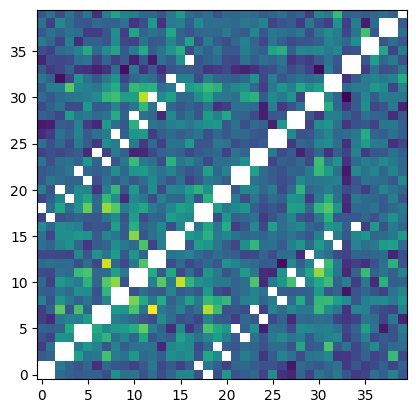

In [497]:
plt.imshow(S, origin='lower')

In [503]:
Sacc = UrbanDat.SaccadeSel(UrbanDat.GetSaccades(), nHor=5, InferS=False)
SimSacP = UrbanDat.SacSim1GroupAll2All(Sacc, Thr=10, normalize='add')

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades


In [504]:
SimSacP.shape

(40, 40, 64, 64, 5, 5)

In [505]:
S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 5), 4), 3), 2)

C:\Users\nickp\AppData\Local\Temp\ipykernel_19900\3782371002.py:1: RuntimeWarning: Mean of empty slice
  S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 5), 4), 3), 2)


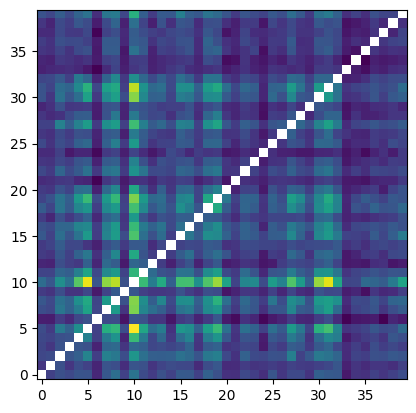

In [506]:
plt.imshow(S, origin='lower')

In [507]:
# Check if the matrix is symmetric
np.allclose(S, S.T)

False

In [484]:
S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 0), 0), 3), 2)

C:\Users\nickp\AppData\Local\Temp\ipykernel_19900\2517902481.py:1: RuntimeWarning: Mean of empty slice
  S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 0), 0), 3), 2)


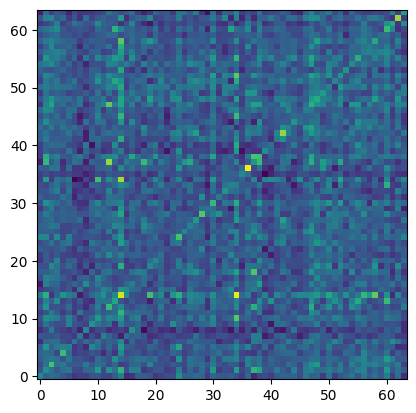

In [485]:
plt.imshow(S, origin='lower')

In [8]:
S0,S1,S2 = UrbanDat.SacSimPipelineAll2All(divs=[5], Thr=10, InferS=True, normalize='add')

0 5


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades
C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:245: RuntimeWarning: Mean of empty slice
  StimSimsInd[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0)
C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:246: RuntimeWarning: Mean of empty slice
  StimSims[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0),0)
C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:248: RuntimeWarning: Mean of empty slice
  return StimSims,np.nanmean(StimSimsInd,0),SimsAll


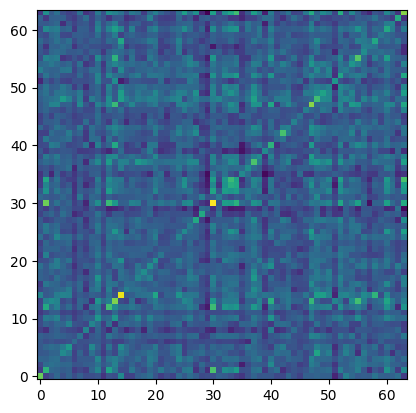

In [9]:
plt.imshow(S0[0], origin='lower')

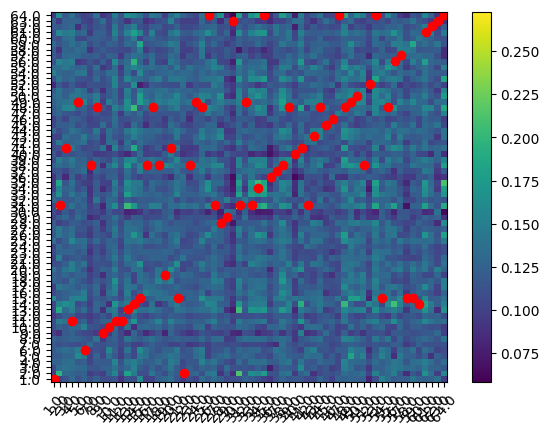

In [11]:
UrbanDat.VisSimmat(S0[0])

In [ ]:
S0,S1,S2 = UrbanDat.SacSimPipelineAll2All(divs=[9], Thr=5, InferS=True, normalize='add')

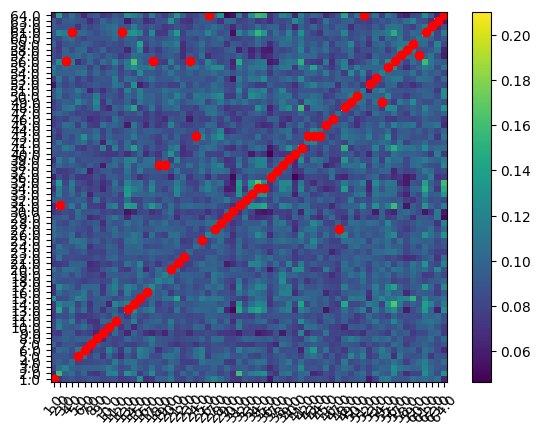

In [13]:
UrbanDat.VisSimmat(S0[0])

In [8]:
S0,S1,S2 = UrbanDat.SacSimPipelineAll2All(divs=[20], Thr=10, InferS=True, normalize='add')

0 20


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades
C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:245: RuntimeWarning: Mean of empty slice
  StimSimsInd[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0)
C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:246: RuntimeWarning: Mean of empty slice
  StimSims[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP,5),4),0),0)
C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:248: RuntimeWarning: Mean of empty slice
  return StimSims,np.nanmean(StimSimsInd,0),SimsAll


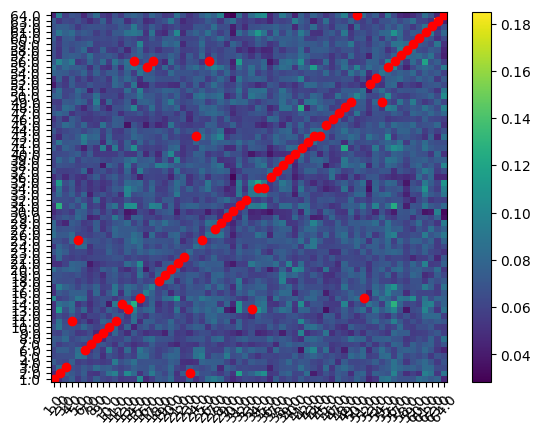

In [9]:
UrbanDat.VisSimmat(S0[0])

---

In [ ]:
S0,S1,S2 = UrbanDat.SacSimPipelineAll2All(divs=[9], Thr=0, InferS=True, method='peak180')

In [ ]:
UrbanDat.VisSimmat(S0[0], negative=True)